<a href="https://colab.research.google.com/github/tincorpai/Deep_Learning_Pytorch/blob/master/PyTorch_Computer_Vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   Computer Vision Convolutional Neural Networks with PyTorch

Computer vision can be segmented into the following sections:

* Binary Classification

* Multi Classification

* Object detection

* Segmetation

## Things to cover in PyTorch

* Getting a vision dataset to work with using torchvision.datasets

* Architecture of a convolutional neural network (CNN) with PyTorch

* An end-toend multi-class image classification problem 

* Steps in modelling with CNNs in PyTorch

    * Creating a CNN model withPyTorch

    * Picking a loss and optimizer

    * Training a model

    * Evaluating a model.

## Computer Vision Inputs and Outputs

The ways to represent an image in numbers is to use the weight, heaight and channels.

We will represent our images in form of a tensor which will, in many cases, be our input into our machine learning model.


Ensure that your tensor lines up with each other. For instance, our image input can be in form of a list such as `[batch_size, width, height, colour_channels]`

batch_size can be changed depending on the problem you are working on.

Image data can be represented in this form `[batch_size, height, width, colour_channels]` or in this form `[batch_size, colour_channels, height, width]`


We will apply 

## What is Convolutional Neural network?

A convolutional neural network is a deeplearning framework able to take an image as an input and able to categorize each object in an image in order to differentiate one from the other. 

A good resources that give in depth definition of Neural network can be in this link: https://towardsdatascience.com/a-comprehensive-guide-to-convolutional-neural-networks-the-eli5-way-3bd2b1164a53

We will be working with Convolutional neural network and the work frame is given as follows:

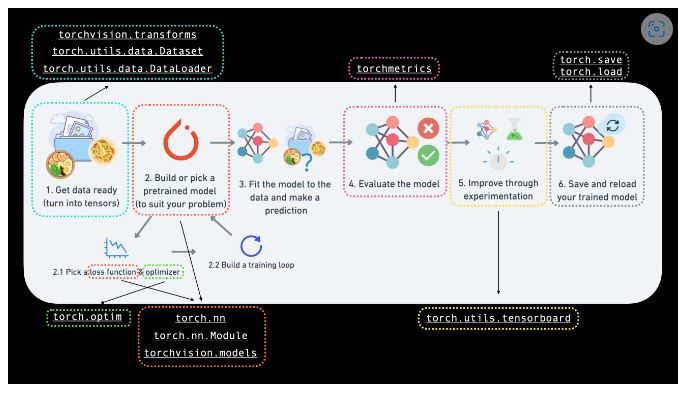

## PyTorch Computer Vision 


*  See reference online book:  https://www.learnpytorch.io/03_pytorch_computer_vision/

### 0. Computer vision libraries in PyTorch

*  [`torchvision`](https://pytorch.org/vision/stable/index.html) - it is the base domain library in PTorch Computer Vision

* [`torchvision.datasets`](https://pytorch.org/vision/stable/datasets.html) - get datasets and data loading functions for computer vision here 

* [`torchvision.models`](https://pytorch.org/vision/0.8/models.html) - get pretrained computer vision models that you can leverage for your own problems.

* [`torchvision.transforms`](https://pytorch.org/vision/0.11/transforms.html) - functions for manipulating your vision data (images) tobe suitable for use with an ML model.

* [`torch.utils.dataDataset`](https://pytorch.org/docs/stable/data.html)- Base dataset class for PyTorch

* [`torch.utils.data.DataLoader`](https://pytorch.org/docs/stable/data.html) - Creates a Python iterable over a dataset.

In [2]:
# Import PyTorch
import torch
from torch import nn

#Import torchvision
import torchvision
from torchvision import datasets 
from torchvision import transforms
from torchvision.transforms import ToTensor 


# Import matplotlib for visualization
print(torch.__version__)
print(torchvision.__version__)

1.13.1+cu116
0.14.1+cu116


##1. Getting a dataset

The dataset we will be using is FashionMNIST fro torchvision.datasets-
https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [3]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", #where to download the datset
    train=True,   # do we want the training dataset?
    download=True, # do we wnat to download yes/no?
    transform=torchvision.transforms.ToTensor(), #how do we wnat to transform the data
    target_transform=None  #how do want to download the labels/targets
)


test_data = datasets.FashionMNIST(
    root="data", 
    train=False,   
    download=True, 
    transform=torchvision.transforms.ToTensor(), 
    target_transform=None  
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
# See the fist train example 
image, label = train_data[0]


In [6]:
class_names = train_data.classes
class_names 

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [9]:
print(f"image shape:{image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

image shape:torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


Our input shape format for this dataset is `[None, 1, 28, 28]` and output shape is 10.

### 1.2 Visualizing our data

image shape: torch.Size([1, 28, 28])


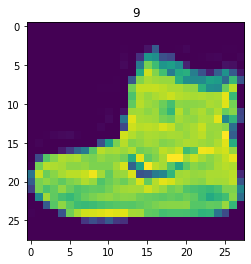

In [10]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"image shape: {image.shape}")
plt.imshow(image.squeeze())
plt.title(label);

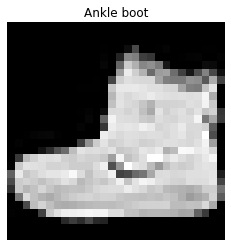

In [11]:
plt.imshow(image.squeeze(), cmap ="gray")
plt.title(class_names[label]);
plt.axis(False);

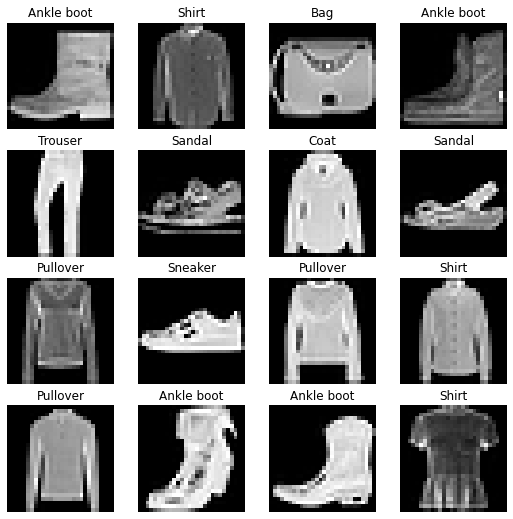

In [12]:
#Visualize multiple images at a time
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False);


Do you think these items of clothing (images) could be modelled with pure linear lines? Or do you think we'll need non-linearities?

## 2. Prepare DataLoader

We want to convert our dataset, which is in form of collection of our dataset, into a data loader 

A dataLoader turns our dataset into a Python iterable.

Categorically, we want to turn our data into batches (or mini-batches).

Why is this important?

1. It is more compuationalally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32)

2. It gives our neural network more chances to update its gradients per epoch.

For more on mini-batches, see here: https://www.youtube.com/watch?v=l4lSUAcvHFs&t=9s

In [13]:
from torch.utils.data import DataLoader

#Set up the batch size hyperparameter 
BATCH_SIZE = 32

# Turn datasets into iterables (batches)

train_dataloader = DataLoader(dataset=train_data,
                               batch_size=BATCH_SIZE, 
                               shuffle=True)
                    

test_dataloader = DataLoader(dataset=test_data,
                             batch_size = BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7f96c083d4f0>,
 <torch.utils.data.dataloader.DataLoader at 0x7f96c083d3d0>)

In [14]:
#Let's check out what we've created.
print(f"DataLoader: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}..")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x7f96c083d4f0>, <torch.utils.data.dataloader.DataLoader object at 0x7f96c083d3d0>)
Length of train_dataloader: 1875 batches of 32..
Length of test_dataloader: 313 batches of 32...


In [15]:
#Get the shape of each 32 batches
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape


(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 8, label size: torch.Size([])


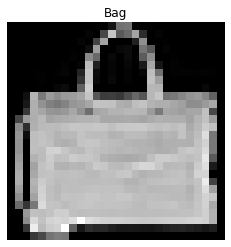

In [16]:
#show a sample
#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

## 3. Model 0: Build a baseline mode

When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments

In other words: start simply and add complexity when necessary.

In [17]:
# Create a flaten layer
flatten_model = nn.Flatten()

#Get a single sample
x = train_features_batch[0]

#Flatten the sample
output = flatten_model(x)   #perform forward pass


#print out
print(f"shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"shape after flattening: {output.shape} -> [color_channels, height*width]")

shape before flattening: torch.Size([1, 28, 28]) -> [color_channels, height, width]
shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


This means we have one value per pissel in our training vector.

In [18]:
from torch import nn
class FashiionMNISTModelVO(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(
            in_features=input_shape,
            out_features=hidden_units),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
        )
  
  def forward(self, x):
    return self.layer_stack(x)

In [19]:
torch.manual_seed(42)

#Setup model with input parameters
model_0 = FashiionMNISTModelVO(
    input_shape=784, # this is 28*28
    hidden_units=10,  #how many units in the hidden layer
    output_shape=len(class_names)  # one for every class
).to("cpu")

model_0

FashiionMNISTModelVO(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

The main premise of machine learning is to pass our data through a model and make use of our optimizer to update the random values generated by our initial model to bethe tter represent features in our data. Features in our images could mean anything.

We are going to tell our model what features to learn about our data. The moel figures out what features to learn.

### 3.1 Set up loss, optimizer and evaluation metrics

*  Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`

* Optimizer - out optimizer `torch.optim.SGD()` (Stochastic Gradient Descent)

* Evaluation metric - Since we're working on a classification problem let's use accuracy as our evaluation metrics.

In [20]:
#Gets help function
import requests 
from pathlib import Path


#Download helper functions from Learn PyTorch repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Download helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary

Download helper_functions.py


In [21]:
# Import accuracy metric 
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiment


Tow of the main things you'll often want to track are:

1. Model's peformance (loss and accuracy values etc.)

2. How fast it runs

In [22]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
  """Prints difference between start and end time"""
  total_time = end - start
  print(f"Train time on {device}: {total_time:3f} seconds")
  return total_time
  


In [23]:
start_time = timer()
# Insert some code here

end_time = timer()
print_train_time(start=start_time, end=end_time, device = "cpu") #This returns the time of the code running

Train time on cpu: 0.000039 seconds


3.89329999848087e-05

### 3.3 Creating a training loop and training a model on  batches of data...



*  Loop through epochs.

*  Loop through training batches, perform training steps, calculate the train loss **per batch**

*  Print out what's happening behind the loop

*  Time it all 

In [24]:
# import tqdm  -> gives us how many epochs our training loop has gone through
from tqdm.auto import tqdm

#Set the seed and start the timer
torch .manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training time)
epochs = 3

# Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-----")
  ### training
  train_loss = 0
  #Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    model_0.train()
    #1. Forward pass 
    y_pred = model_0(X)

    #2. Calculate loss (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulate train loss

    #3. Optimizer zero grad 
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #. Optimizer steps
    optimizer.step()


    #Print out what's happening 
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")

  #Divide total train loss by length of train dataloader -> return average loss per epoch
  train_loss /= len(train_dataloader)


  ### Testing 
  test_loss, test_acc = 0, 0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      #1. Forward pass 
      test_pred = model_0(X_test)

      #2. Calculate loss (accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      #3. Calculate the accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) #This returns the true class of our sample.

    #4. Calculate the test loss average per batch
    test_loss /= len(test_dataloader)

    #Claculate the test acc average per batch
    test_acc /= len(test_dataloader)

  #Print out what's happening
  print(f"\nTain loss: {train_loss:.4f} | Test loss: {test_loss:.4f}, Test acc: {test_acc:.4f}")


#Calulate the training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                            end=train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))







  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Tain loss: 0.5904 | Test loss: 0.5095, Test acc: 82.0387
Epoch: 1
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Tain loss: 0.4763 | Test loss: 0.4799, Test acc: 83.1969
Epoch: 2
-----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

Tain loss: 0.4550 | Test loss: 0.4766, Test acc: 83.4265
Train time on cpu: 24.104615 seconds


## 4. Make predictions and get Model 0 results 

Let's create a function that will evaluate several models at the same time.

This is useful especially when we have multiple models to evaluate -> Write the function once and apply multiple times on different models.

In [25]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):  #tqdm -> returns a progress bar.
      #Make predictions
      y_pred = model(X)


      #Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      
    # Scale loss and acc to find the aveage loss/acc per bacth
    loss /= len(data_loader)
    acc /= len(data_loader)
    
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
  
#Calculate model 0 results on test dataset
model_0_results = eval_model(model=model_0,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashiionMNISTModelVO',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

##5. Setup device agnostic-code (for using a GPU if there is one)

In [26]:
# Setup device-agnostic code 
import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-linearity

We learned abut the power of non-linearity in notebook 02

Here, we want to try the non-linearity by creating another model that incorporate non-linearity model. 

With this method, we want to learn if the inclusion of a non-linear layer such as `nn.ReLU()` to improve the performance of our previous layer will help to improve on model performance. 

In the code that follows, we include the `nn.ReLU()` layer to create an improve version of `model_0` called `model_1`

In [27]:
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),  # Flattening inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features=output_shape),
        nn.ReLU(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape),
        nn.ReLU()
    )
  
  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)

In [28]:
# Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784,  # this is the output of the flatten after our 28*28
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) # send to the GPU if it's available.


next(model_1.parameters()).device 

device(type='cpu')

In [29]:
!nvidia-smi

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



### 6.1 Setup loss, optimizer and evaluation

When running an experiment, you will want to change one parameter at a time just to narrow down on what exactly influence your model -> what improves the model vs what does not improve it.

In [30]:
# Import accuracy metric 
from helper_functions import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()  # Measure how wrong our model is.
optimizer = torch.optim.SGD(params=model_1.parameters(),  #tries to update our model's paramters to reduce the loss.
                            lr=0.1)

### 6.2 Functioning training and evaluation/testing loops

Let's create a function for:

* training loop - `train_step()`

* testing loop - `test_step()`

In [31]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):
  
  """Perform a training with model trying to learn on data_loader."""
  ### training
  train_loss, train_acc = 0, 0

  # Put model into training mode
  model.train()

  #Add a loop to loop through the training batches
  for batch, (X, y) in enumerate(train_dataloader):
    #Put data on target device
    X, y = X.to(device), y.to(device)

    #1. Forward pass 
    y_pred = model(X)

    #2. Calculate loss and accuracy (per batch)
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumulate train loss
    train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels -> accumulating the train_acc on the training dataset

    #3. Optimizer zero grad 
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #. Optimizer steps
    optimizer.step()


  #Divide total train loss by length of train dataloader -> return average loss per epoch
  train_loss /= len(train_dataloader)
  train_acc /= len(data_loader)
  print(f"Train loss: {train_loss:.5f}| Train_acc:{train_acc:.2f}%")




In [32]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = device):
  """Performs a testing loop step on model going over data_loader."""
  test_loss, test_acc = 0, 0

  #put the model in the eval mode
  model.eval()

  #Turn on inference mode context manager
  with torch.inference_mode():
    for X, y in data_loader:
      # Send the data to the target device 
      X, y = X.to(device), y.to(device)

      #1. Forward pass
      test_pred = model(X)

      #2. Calculate the loss/acc
      test_loss += loss_fn(test_pred, y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

    #Adjust the metrics and print out what is happening
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")



In [33]:
torch.manual_seed(42)

#Measure time 
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

#Set epochs -> compare how long our model took on cpu vs gpu
epochs = 3

#Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn= accuracy_fn,
             device=device)
  
  test_step(model=model_1, 
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  

train_time_end_on_gpu = timer()  #measure the training time of model_1
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu, 
                                            device=device)



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 1.09199| Train_acc:61.34%
Test loss: 0.95636 | Test acc: 65.00%

Epoch: 1
-------
Train loss: 0.78101| Train_acc:71.93%
Test loss: 0.72227 | Test acc: 73.91%

Epoch: 2
-------
Train loss: 0.67027| Train_acc:75.94%
Test loss: 0.68500 | Test acc: 75.02%

Train time on cpu: 23.162172 seconds


**Note:** Sometimes, depending on your data/hardware you might find that your model trains faster on CPU than on GPU.

Why is this?

1) It could be the overhead for copying data/model to and from the GPU outweighs the compute benefits offered by GPU.

2) The hardwareyou're usng has a better CPU in terms of copute capability than the GPU.

In otherwords, you will get a benefit of speed up when you are running larger dataset.

For more on how to make your model to compute faster, see here:
https://horace.io/brrr_intro.html

In [34]:
model_0_results


{'model_name': 'FashiionMNISTModelVO',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

In [35]:
total_train_time_model_0

24.104614508000026

In [36]:
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Returns a dictionary containing the results of model predicting on data_loader."""
  loss, acc = 0, 0
  model.eval()
  with torch.inference_mode():
    for X, y in tqdm(data_loader):#tqdm -> returns a progress bar.
      #make our data device agnostic 
      X, y = X.to(device), y.to(device)
    


      #Make predictions
      y_pred = model(X)


      #Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred, y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))
      
    # Scale loss and acc to find the aveage loss/acc per bacth
    loss /= len(data_loader)
    acc /= len(data_loader)
    
  return {"model_name": model.__class__.__name__,
          "model_loss": loss.item(),
          "model_acc": acc}
  


In [37]:
#Calculate model 0 results on test dataset
model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

## Model 2: Building a Convolutional Neural Network (CNN)

CNN's are also known as ConvNets.

CNN's are known for their capabilities to find patterns in visual data.

This is a typical structure of convolutional neural network:

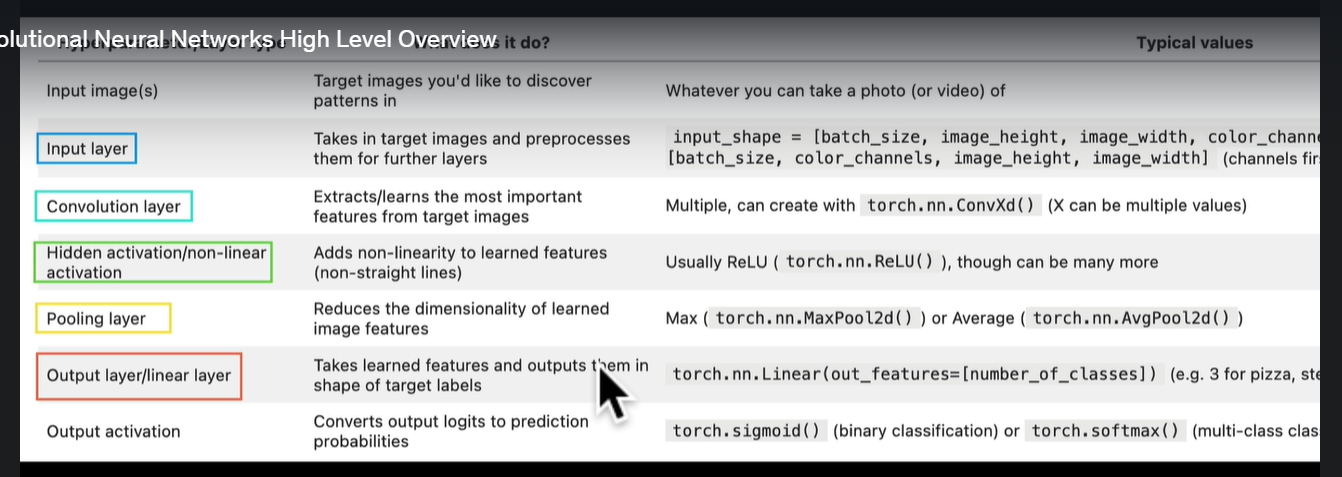

The more layers you add to your deep learning model, the more chances it has to find patterns in the data.


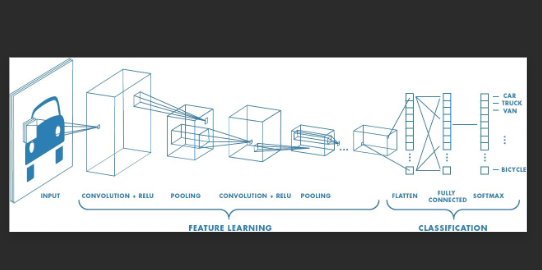

This is made possible in such a way that each different layer will perform a different types of mathematical operations on the image inputs and each subsequent layer receives its input from its inputs from the previous layer


To get first class information on how CNN works, check out this website:

https://poloclub.github.io/cnn-explainer/

The main work of our model is to take the input and try to compress and compress the input images to find the most generalizable input to get to the desire outcome. That input will be a feature vector to our final layer.

The available hidden layers are feature extracted, in other words, they are trying to learn patterns inherent in our dataset and the final layers will take those features ans classify them intoour targets classes. What ever our model thinks best suits those features or what ever our model thinks those features learnt represents in our classes.

In [38]:
from torch.nn.modules.container import Sequential
# Create a convolutinal neural network
class FashionMINISTModelV2(nn.Module):
  """
  Model architecture that replicates the TinyVGG 
  model from CNN explainer website.
  """
  def __init__(self, input_shape:int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        #Create a conv layer - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),  # values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,  
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
           
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
   )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_shape)
   )
        
  def forward(self, x):
    x=self.conv_block_1(x)
    #print(f"Output shape of conv_block_1: {x.shape}")
    x =self.conv_block_2(x)
    #print(f"Output shape of conv_block_2: {x.shape}")
    x = self.classifier(x)
    #print(f"Output shape of classifier: {x.shape}")

    return x

In [39]:
torch.manual_seed(42)
model_2 = FashionMINISTModelV2(input_shape=1,
                             hidden_units=10,
                             output_shape=len(class_names)).to(device)

(<matplotlib.image.AxesImage at 0x7f96c05d2d60>, torch.Size([1, 28, 28]))

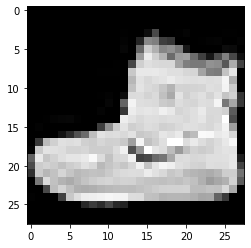

In [40]:
plt.imshow(image.squeeze(), cmap="gray"), image.shape

In [41]:
#this is for testing
rand_image_tensor = torch.randn(size=(1, 28, 28))
rand_image_tensor.shape

torch.Size([1, 28, 28])

The trick is to print the shape of previous layers and see whether or not they line up with subsequent layers.

If we noticed, the output shape of `conv_block_2` is `[1, 10, 7, 7]`. The little trick is done on the model by multiplying the hidden_units of the `conv_block_2` by  twice.

In [42]:
#pass image through model
model_2(rand_image_tensor.unsqueeze(0).to(device))

tensor([[ 0.0366, -0.0940,  0.0686, -0.0485,  0.0068,  0.0290,  0.0132,  0.0084,
         -0.0030, -0.0185]], grad_fn=<AddmmBackward0>)

### 7.1 Stepping through `nn.Conv2d()`

See the documentation for `nn.Conv2d()` here - https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [43]:
#let's create a dummy data
torch.manual_seed(42)

#Create a batch of images
images = torch.randn(size=(32, 3, 64, 64))
test_image = images[0]


print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image:\n {test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image:
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [44]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight', tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
                    

As we can see, our model is a connection of random numbers. We pass data in and adjust these random numbers within the layers of our model to best represent our data.

The kernel passsing through the image to perform some sort of a mathematical operations. the main idea of a convolution layer is to try to make sure that the kernel performs the right operations to get the right output. The kernel lerns how to best represents the data on its own by looking more data.

The reason the output compresses is because we are skipping some pissel as we move across the image. What convolution neural network try to compress the input into some representation that best suits the data.

Padding means adding an extra pizzels around the edges. 

The network takes an input data and figure out what features best represent whatever the input data is and compress them into a feature vector that is going to be our output.

We are trying to compress the information from a higher dimensionality space to a smaller dimensionality space representing the original tensor.

If we got this learnt features from our convolutional layer, will the most important pattern stay around if we take the maximum of a certain section. 

By using nn.maxPoolND to take a maximum of a certain region, we've got potentially the most important feature of that region at little section.

In [45]:
torch.manual_seed(42)
#Create a single Con2d layer
conv_layer = nn.Conv2d(in_channels=3,
                      out_channels=10,
                      kernel_size=(5, 5), 
                      stride=1,
                      padding=1)


#Pass the data through the convolutional layer
conv_output = conv_layer(test_image.unsqueeze(0))
conv_output.shape

torch.Size([1, 10, 62, 62])

In [46]:
test_image.unsqueeze(0)


tensor([[[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
          [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
          [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
          ...,
          [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
          [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
          [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

         [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
          [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
          [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
          ...,
          [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
          [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
          [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

         [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
          [-1.4647, -1.9571,  

### 7.2 Stepping through `nn.MaxPool2d()`
https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html



In [47]:
test_image.shape

torch.Size([3, 64, 64])

In [48]:
# Print out original shape without unsqueezed dimension
print(f"Test image original shape: {test_image.shape}")
print(f"Test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

#Create a sample nn.MaxPool2d
max_pool_layer = nn.MaxPool2d(kernel_size=2)


#Pass data through just the conv_layer
test_image_through_conv = conv_layer(test_image.unsqueeze(dim=0))
print(f"Shape after going through conv_layer(): {test_image_through_conv.shape}")

#Pass data through the max pool layer
test_image_through_conv_and_max_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after going through conv_layer() and max_pool_layer(): {test_image_through_conv_and_max_pool.shape}")

Test image original shape: torch.Size([3, 64, 64])
Test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after going through conv_layer(): torch.Size([1, 10, 62, 62])
Shape after going through conv_layer() and max_pool_layer(): torch.Size([1, 10, 31, 31])


In [49]:
torch.manual_seed(42)
#Create a random tensor with a similar number of dimensions to our images.
random_tensor = torch.randn(size=(1, 1, 2, 2))
print(f"\nRandom tensor:\n{random_tensor}")
print(f"Random tensor shape: {random_tensor.shape}")

#Create a max pool layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)


#Pass the random tensor through the max pool layer
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax pool tensor:\n {max_pool_tensor}")
print(f"Max pool tensor shape: {max_pool_tensor.shape}")
random_tensor


Random tensor:
tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])
Random tensor shape: torch.Size([1, 1, 2, 2])

Max pool tensor:
 tensor([[[[0.3367]]]])
Max pool tensor shape: torch.Size([1, 1, 1, 1])


tensor([[[[0.3367, 0.1288],
          [0.2345, 0.2303]]]])

### 7.3 Setting up a loss function and a optimizer for model_2

In [50]:
# Setup loss function/eval metrics/optimizer
from helper_functions import accuracy_fn


loss_fn = nn.CrossEntropyLoss()   #use CrossEntropyLoss() function for multiple classification
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

### 7.4 Training and testing model_2 using our training and test functions

In [51]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

#Measure time 
from timeit import default_timer as timer
train_time_start_on_gpu = timer()

#Set epochs -> compare how long our model took on cpu vs gpu
epochs = 3

#Create a optimization and evaluation loop using train_step() and test_step()
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_2,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn= accuracy_fn,
             device=device)
  
  test_step(model=model_2, 
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)
  

train_time_end_on_gpu = timer()  #measure the training time of model_1
total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu,
                                            end=train_time_end_on_gpu, 
                                            device=device)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.59289| Train_acc:78.53%
Test loss: 0.39099 | Test acc: 86.02%

Epoch: 1
-------
Train loss: 0.36410| Train_acc:87.02%
Test loss: 0.35903 | Test acc: 86.88%

Epoch: 2
-------
Train loss: 0.32691| Train_acc:88.18%
Test loss: 0.32382 | Test acc: 88.40%

Train time on cpu: 124.481200 seconds


In [52]:
# Get model_2 results
model_2_results = eval_model(
    model=model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn,
    device=device
)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMINISTModelV2',
 'model_loss': 0.32381823658943176,
 'model_acc': 88.39856230031948}

In [53]:
#Comparing our results to baseline results 
model_0_results

{'model_name': 'FashiionMNISTModelVO',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

## 8. Compare the results and training time

In [54]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results, # for neural network train of a CPU
                                model_1_results,  #linear model train on a GPU
                                model_2_results])  #conv2d model train on a GPU
compare_results

,model_name,model_loss,model_acc
0,FashiionMNISTModelVO,0.476639,83.426518
1,FashionMNISTModelV1,0.685001,75.019968
2,FashionMINISTModelV2,0.323818,88.398562


In [55]:
# Add training time to results comparison
compare_results["training_time"] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]

compare_results

,model_name,model_loss,model_acc,training_time
0,FashiionMNISTModelVO,0.476639,83.426518,24.104615
1,FashionMNISTModelV1,0.685001,75.019968,23.162172
2,FashionMINISTModelV2,0.323818,88.398562,124.481200


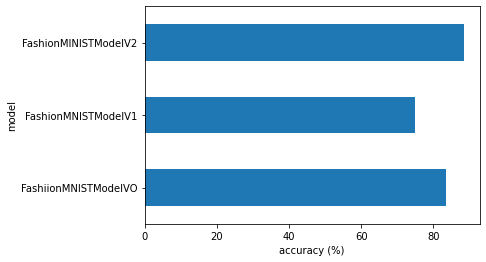

In [56]:
#Visualize our model results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy (%)")
plt.ylabel("model");

## 9. Make and evaluate random predictions with best model.

In [57]:
# make a function
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      #prepare the sample (add a batch dimension and pass to target device)
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # Forward pass (model outputs raw logits)
      pred_logit = model(sample)

      # Get prediction probability (logits -> prediction probabiity)
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      #Get pred_prob off the GPU for further calculations -> to make sure our prediction probability is off the GPU
      pred_probs.append(pred_prob.cpu())
      
  # Stack the pred_probs to turn list into a tensorr
  return torch.stack(pred_probs)



In [58]:
img, label = test_data[0][:10]   #we will get the image tensor and the associated label.
img.shape, label

(torch.Size([1, 28, 28]), 9)

In [59]:
import random 
#random.seed(42)
test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
  test_samples.append(sample)
  test_labels.append(label)


#View the first sample sahpe
test_samples[0].shape



torch.Size([1, 28, 28])

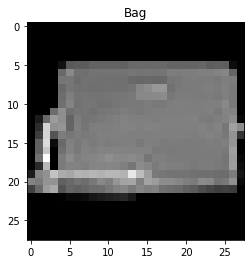

In [60]:
#return  the first image from the tensor dataset.
plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]]);

In [61]:
#Make some predictiobs with our test_sample to see how it works on the unseen dataset.
pred_probs = make_predictions(model=model_2,
                              data=test_samples)


#View first two prediction probabilities 
pred_probs[:2]

tensor([[3.5323e-03, 2.4949e-05, 7.2373e-03, 3.9529e-05, 8.0440e-04, 2.7511e-04,
         2.8659e-02, 1.7944e-03, 9.5593e-01, 1.7041e-03],
        [2.4593e-04, 8.2757e-05, 2.3944e-04, 9.9880e-01, 4.2040e-04, 1.7475e-07,
         1.8130e-04, 2.5846e-06, 2.9659e-05, 4.5337e-07]])

In [62]:
#Convert prediction probabilities to lebels 
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([8, 3, 7, 0, 1, 3, 1, 1, 9])

In [63]:
test_labels

[8, 3, 7, 0, 1, 3, 1, 1, 9]

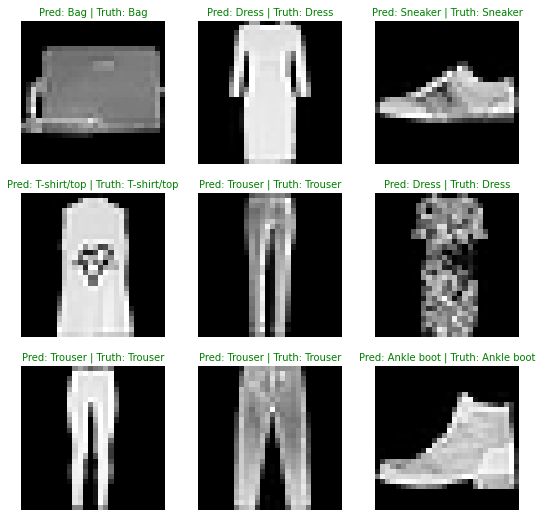

In [64]:
# Plot predictions
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  #create s subplot
  plt.subplot(nrows, ncols, i+1)

  # Plot the traget image 
  plt.imshow(sample.squeeze(), cmap="gray")

  # Find the prediction (in text form, e.g "Sandal")
  pred_label = class_names[pred_classes[i]]


  #Get the truth label (in text form)
  truth_label = class_names[test_labels[i]]

  #Create a title for the plot
  title_text =  f"Pred: {pred_label} | Truth: {truth_label}"

  # Check for equality between pred and truth and change color of title text
  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c="g") # green text if prediction same as truth
  else:
    plt.title(title_text, fontsize=10, c="r")


  plt.axis(False)





We can see from our prediction, that we got all of our first ten predictions right.

##10 Making a confusin matrix for further prediction evaluation


A confusion matrix is a superb way of evaluating our classifcation odels visually:
https://www.learnpytorch.io/03_pytorch_computer_vision/#9-make-and-evaluate-random-predictions-with-best-model


1. Make predictions with our trained model on the test dataset

2. Make a confusion matrix `torchmetrics.ConfusionMatrix`.
https://torchmetrics.readthedocs.io/en/stable/classification/confusion_matrix.html

3. Plot the confusion matrix using `mlxtend.plotting.plot_confusion_matrix()`
http://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/

In [65]:
# Import tqdm.auto
from tqdm.auto import tqdm

#1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Making predictions..."):
    #Send the data and targets to target device
    X, y = X.to(device), y.to(device)
    #Do the forward pass
    y_logit = model_2(X)
    # Turn predictions from logits -> prediction probabilities -> prediction labels
    y_pred = torch.softmax(y_logit.squeeze(), dim = 0).argmax(dim=1)

    # Put prediction to CPU for evaluation 
    y_preds.append(y_pred.cpu())


# Concatenate list of predictions into a tensor 
#print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor







Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

tensor([9, 2, 1,  ..., 8, 1, 8])

In [66]:
len(y_pred_tensor)

10000

In [67]:
# See if required packages are install if not install them...
try:
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")
  assert int(mlxtend.__version__.split(".")[1]>= 19, "mlxtend version should be 0.19.0 or higher")
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.5 MB/s eta 0:00:00
mlxtend version: 0.21.0


In [68]:
import mlxtend
print(mlxtend.__version__)

0.21.0


### 10.2 Make a confusion matrix

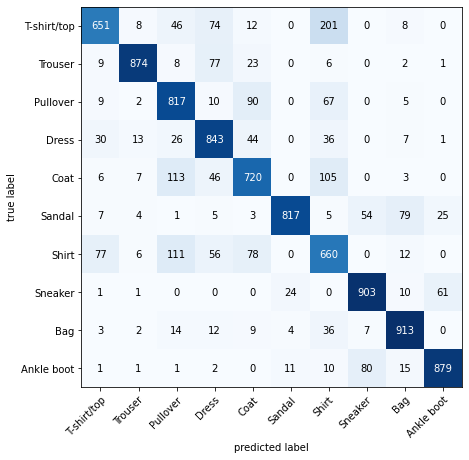

In [81]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

#2.  Setup confusion instance and compare predictions to targets 
confmat = ConfusionMatrix(task = "multiclass", num_classes=len(class_names))
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)


# 3. Plt the confuson matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matlotlib likes working with numpy
    class_names=class_names,
    figsize=(10, 7)
)

As we can see, confusion matrix is one of the most powerful ways of visualize your classification model predictions.

##11 Saving and Loading Our Best Performing Model

In [84]:
from pathlib import Path

#Create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

#Create model saved
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(),
           f=MODEL_SAVE_PATH)

Saving model to: models/03_pytorch_computer_vision_model_2.pth


In [85]:
# Create a new instance
torch.manual_seed(42)

loaded_model_2 = FashionMINISTModelV2(input_shape=1,
                                      hidden_units=10,
                                      output_shape=len(class_names))

#Load in the save state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

#Send the model to the target device 
loaded_model_2.to(device)

FashionMINISTModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [86]:
model_2_results

{'model_name': 'FashionMINISTModelV2',
 'model_loss': 0.32381823658943176,
 'model_acc': 88.39856230031948}

In [88]:
#Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn,
    accuracy_fn=accuracy_fn
    
)

loaded_model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMINISTModelV2',
 'model_loss': 0.32381823658943176,
 'model_acc': 88.39856230031948}

In [90]:
#Check if model results are close to each other 
torch.isclose(torch.tensor(model_2_results["model_loss"]),
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-02)

tensor(True)